## Disciplina: Aprendizado Estatístico

### Estudo Dirigido 4

#### Introdução
Neste estudo dirigido, exploraremos o processo de seleção de modelos em estatística usando o conjunto de dados `Hitters` e `R`. Vamos abordar técnicas como Best Subset Regression, Forward Stepwise Selection, Model Selection Using a Validation Set, Model Selection by Cross Validation, Ridge Regression e Lasso Regression.

#### Análise Inicial
- Carregue o pacote `ISLR`.
- Resuma as estatísticas descritivas do conjunto de dados `Hitters` com `summary(Hitters)`.
- Remova os valores ausentes do conjunto de dados com `Hitters=na.omit(Hitters)`.

In [1]:
# library(ISLR)
# summary(Hitters)
data(Hitters, package = "ISLR")

- `library(ISLR)`: Carrega a biblioteca 'ISLR', que é uma coleção de conjuntos de dados para o livro *Introduction to Statistical Learning with Applications in R*

- `summary(Hitters)`: Fornece informações resumidas sobre cada variável no conjunto de dados:
  - Média, mediana, mínimo, máximo e quartis para variáveis numéricas
  - Contagens para variáveis categóricas

In [2]:
# NAs por coluna (antes de remover)
print("NAs por coluna ANTES de na.omit():")
print(colSums(is.na(Hitters)))

# Total de linhas com pelo menos 1 NA
print(paste("Total de linhas com NAs:", sum(!complete.cases(Hitters))))

[1] "NAs por coluna ANTES de na.omit():"
    AtBat      Hits     HmRun      Runs       RBI     Walks     Years    CAtBat 
        0         0         0         0         0         0         0         0 
    CHits    CHmRun     CRuns      CRBI    CWalks    League  Division   PutOuts 
        0         0         0         0         0         0         0         0 
  Assists    Errors    Salary NewLeague 
        0         0        59         0 
[1] "Total de linhas com NAs: 59"


In [3]:
Hitters=na.omit(Hitters)
with(Hitters,sum(is.na(Salary)))

[1] 0

- `Hitters=na.omit(Hitters)`: Remove todas as linhas com valores ausentes (NA):
  - Resultou em 59 NAs removidos
  - A função `na.omit` exclui observações com qualquer valor ausente

- `with(Hitters, sum(is.na(Salary)))`: Verifica valores ausentes na variável `Salary` após a limpeza:
  - `is.na(Salary)` retorna valores TRUE/FALSE para NAs
  - `sum()` conta o total de NAs
  - Resultado: 0 NAs encontrados

#### Best Subset Regression
- Use o pacote `leaps` para realizar a seleção de modelos de `Best Subset` com diferentes tamanhos.
- Plote o critério Cp em função do número de variáveis.
- Identifique o modelo com o menor Cp.

In [4]:
library(leaps)
regfit.full=regsubsets(Salary~.,data=Hitters)
summary(regfit.full)
regfit.full=regsubsets(Salary~.,data=Hitters, nvmax=19)
reg.summary=summary(regfit.full)
names(reg.summary)

Subset selection object
Call: regsubsets.formula(Salary ~ ., data = Hitters)
19 Variables  (and intercept)
           Forced in Forced out
AtBat          FALSE      FALSE
Hits           FALSE      FALSE
HmRun          FALSE      FALSE
Runs           FALSE      FALSE
RBI            FALSE      FALSE
Walks          FALSE      FALSE
Years          FALSE      FALSE
CAtBat         FALSE      FALSE
CHits          FALSE      FALSE
CHmRun         FALSE      FALSE
CRuns          FALSE      FALSE
CRBI           FALSE      FALSE
CWalks         FALSE      FALSE
LeagueN        FALSE      FALSE
DivisionW      FALSE      FALSE
PutOuts        FALSE      FALSE
Assists        FALSE      FALSE
Errors         FALSE      FALSE
NewLeagueN     FALSE      FALSE
1 subsets of each size up to 8
Selection Algorithm: exhaustive
         AtBat Hits HmRun Runs RBI Walks Years CAtBat CHits CHmRun CRuns CRBI
1  ( 1 ) " "   " "  " "   " "  " " " "   " "   " "    " "   " "    " "   "*" 
2  ( 1 ) " "   "*"  " "   " "  " "

[1] "which"  "rsq"    "rss"    "adjr2"  "cp"     "bic"    "outmat" "obj"

- **`regsubsets(Salary ~ ., data = Hitters)`**  
  Ajusta todos os possíveis subconjuntos de variáveis independentes para prever `Salary`

- **`Salary ~ .`**  
  Fórmula que indica o uso de todas as variáveis do conjunto de dados como preditoras

- **`regfit.full`**  
  Variável que armazena o resultado do ajuste do modelo

- **`regsubsets(Salary ~ ., data = Hitters, nvmax = 19)`**  
  Limita o ajuste dos modelos a um máximo de 19 variáveis

- **`names(reg.summary)`**  
  Exibe as métricas disponíveis para avaliação dos modelos

[1] 10

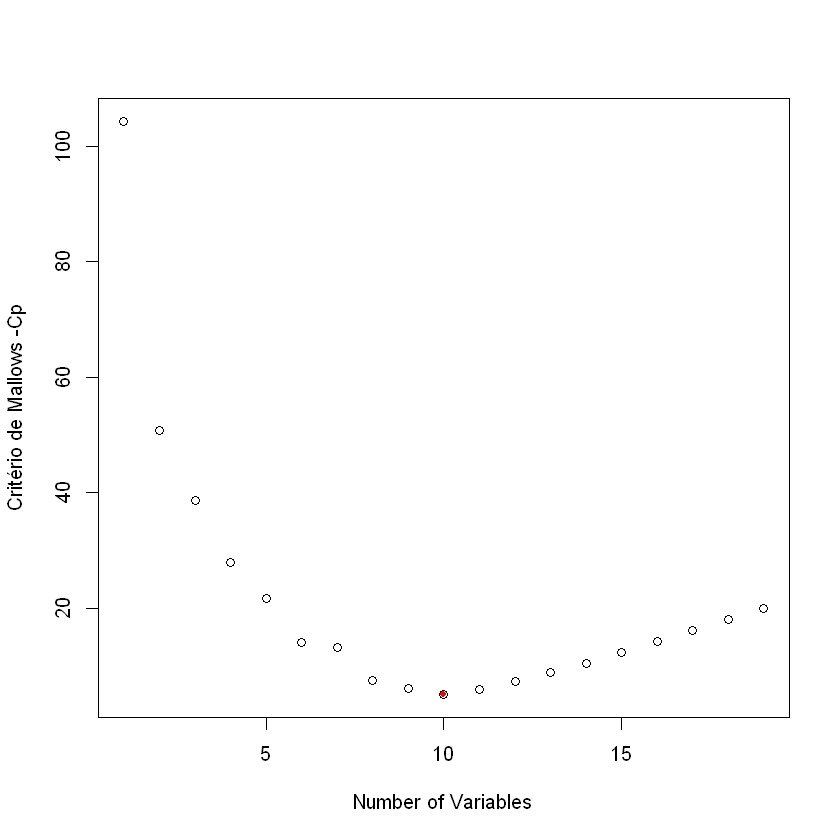

In [5]:
plot(reg.summary$cp,xlab="Number of Variables",ylab="Critério de Mallows -Cp")
# Melhor modelo
which.min(reg.summary$cp)
points(10,reg.summary$cp[10],pch=20,col="red")

O ponto destacado em vermelho no gráfico identifica claramente o melhor compromisso entre:
- Menor número de variáveis
- Menor valor de Cp
- Bom ajuste aos dados

#### Forward Stepwise Selection
- Realize a seleção de modelos usando o método `Forward Stepwise Selection`.
- Plote o critério Cp em função do número de variáveis.

(Intercept)        AtBat         Hits        Walks       CAtBat        CRuns 
 162.5354420   -2.1686501    6.9180175    5.7732246   -0.1300798    1.4082490 
        CRBI       CWalks    DivisionW      PutOuts      Assists 
   0.7743122   -0.8308264 -112.3800575    0.2973726    0.2831680

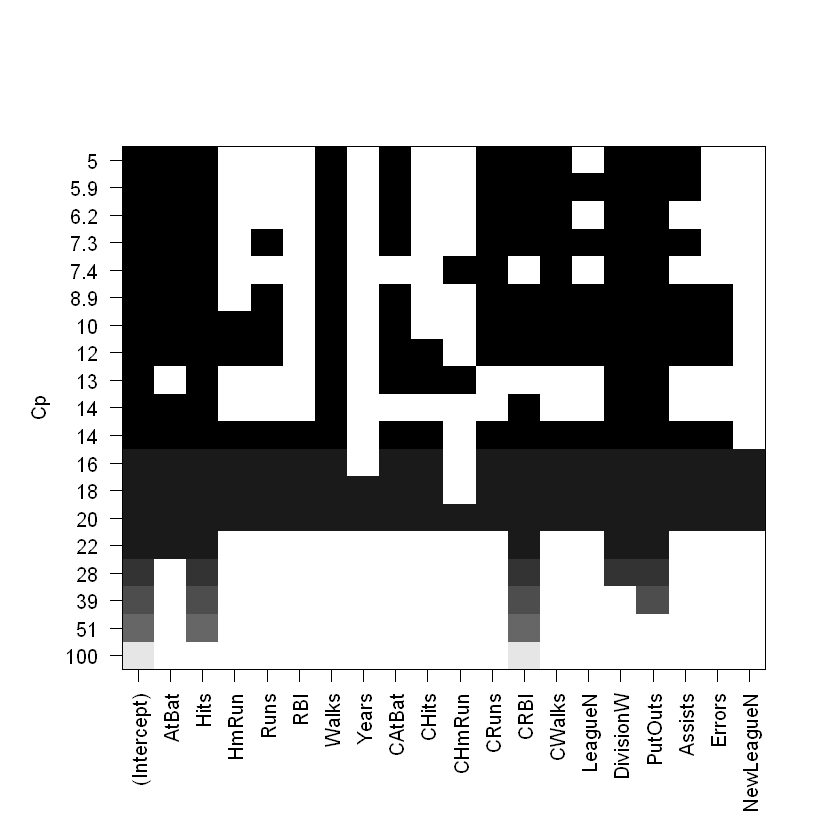

In [6]:
plot(regfit.full,scale="Cp")
coef(regfit.full,10)

Subset selection object
Call: regsubsets.formula(Salary ~ ., data = Hitters, nvmax = 19, method = "forward")
19 Variables  (and intercept)
           Forced in Forced out
AtBat          FALSE      FALSE
Hits           FALSE      FALSE
HmRun          FALSE      FALSE
Runs           FALSE      FALSE
RBI            FALSE      FALSE
Walks          FALSE      FALSE
Years          FALSE      FALSE
CAtBat         FALSE      FALSE
CHits          FALSE      FALSE
CHmRun         FALSE      FALSE
CRuns          FALSE      FALSE
CRBI           FALSE      FALSE
CWalks         FALSE      FALSE
LeagueN        FALSE      FALSE
DivisionW      FALSE      FALSE
PutOuts        FALSE      FALSE
Assists        FALSE      FALSE
Errors         FALSE      FALSE
NewLeagueN     FALSE      FALSE
1 subsets of each size up to 19
Selection Algorithm: forward
          AtBat Hits HmRun Runs RBI Walks Years CAtBat CHits CHmRun CRuns CRBI
1  ( 1 )  " "   " "  " "   " "  " " " "   " "   " "    " "   " "    " "   "*" 
2 

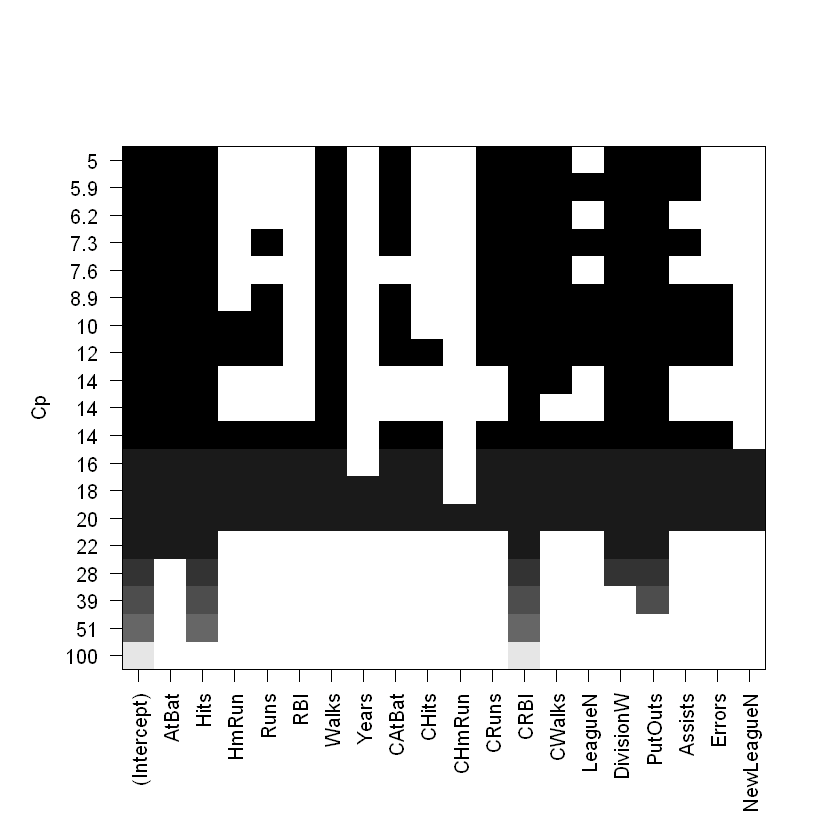

In [7]:
# Ajuste do modelo usando seleção *forward*:
regfit.fwd=regsubsets(Salary~.,data=Hitters,nvmax=19,method="forward")
summary(regfit.fwd)
# Visualização dos resultados:
plot(regfit.fwd,scale="Cp")

**Modelo ótimo**: 

Permanece com 10 variáveis em ambas abordagens

**Diferenças observadas**:
  - Outros modelos apresentam substituições de variáveis
  - Forward Selection é computacionalmente mais eficiente
  - Reduz risco de *overfitting* ao evitar busca exaustiva

**A escolha entre métodos deve considerar**:
  - Natureza dos dados
  - Tamanho do conjunto de dados
  - Balanceamento entre eficiência computacional e precisão

#### Model Selection Using a Validation Set
- Divida o conjunto de dados em treinamento e validação.
- Realize a seleção de modelos no conjunto de treinamento.
- Faça previsões no conjunto de validação e calcule os erros.
- Plote os erros de treinamento e validação em função do número de variáveis.

In [8]:
dim(Hitters)

[1] 263  20

- **`dim(Hitters)`**  
  Retorna as dimensões do conjunto de dados:  
  - 263 amostras
  - 20 variáveis

In [9]:
train=sample(seq(263),180,replace=FALSE)
train

[1]  70 219   9 247 137 182 229 140 164  74 185  90  78 143 136 167 179 119
 [19] 217 222  49 213 246   6  18 109 112 132  98  83 156 190 261 115  93 121
 [37] 147  66 209 216 263 100 197  72 224  32 239  60 245 144  53  31 259  87
 [55] 157 134 201  63 221  84 129 108  45 237   8 162 124 210  30   2 165 202
 [73] 114  12  46 208 149  15 113 135 206  57  62  10  75 125 212 110 148 236
 [91] 211 207 174  95 128 177 138  82 198  52 240 166  20  25  11  68 218  41
[109] 194   1 126  44 215 175 154  71 171 231  69 251 262 180 223 159  58 127
[127]  65  55 186  21 234   7  50  77  42 120 258 123  40 257  56 238 141  33
[145] 103  79  24 254 176   5 170 243 255  91 172  47 142 241 226  38  97 116
[163]  13  19   3 131 200 160 203 139 260  54 181 252 187  17   4  76 173  81

- **`train = sample(seq(263), 180, replace = FALSE)`**  
  Cria um conjunto de treino com 180 observações selecionadas aleatoriamente

In [10]:
regfit.fwd=regsubsets(Salary~.,data=Hitters[train,],nvmax=19,method="forward")

- **`regfit.fwd = regsubsets(Salary ~ ., data = Hitters[train, ], nvmax = 19, method = "forward")`**  
  Ajusta o modelo usando *Forward Stepwise Selection* com:
  - Conjunto de treino
  - Máximo de 19 variáveis preditoras

In [11]:
# Inicializa vetor para armazenar erros de validação
val.errors=rep(NA,19)

# Cria matriz de design para o conjunto de teste
x.test=model.matrix(Salary~.,data=Hitters[-train,])# notice the -index!

# Cálculo dos Erros
for(i in 1:19){
    coefi=coef(regfit.fwd,id=i)
    pred=x.test[,names(coefi)]%*%coefi
    val.errors[i]=mean((Hitters$Salary[-train]-pred)^2)
}

Calcula o Root Mean Squared Error (RMSE) para cada modelo com 1 a 19 variáveis.

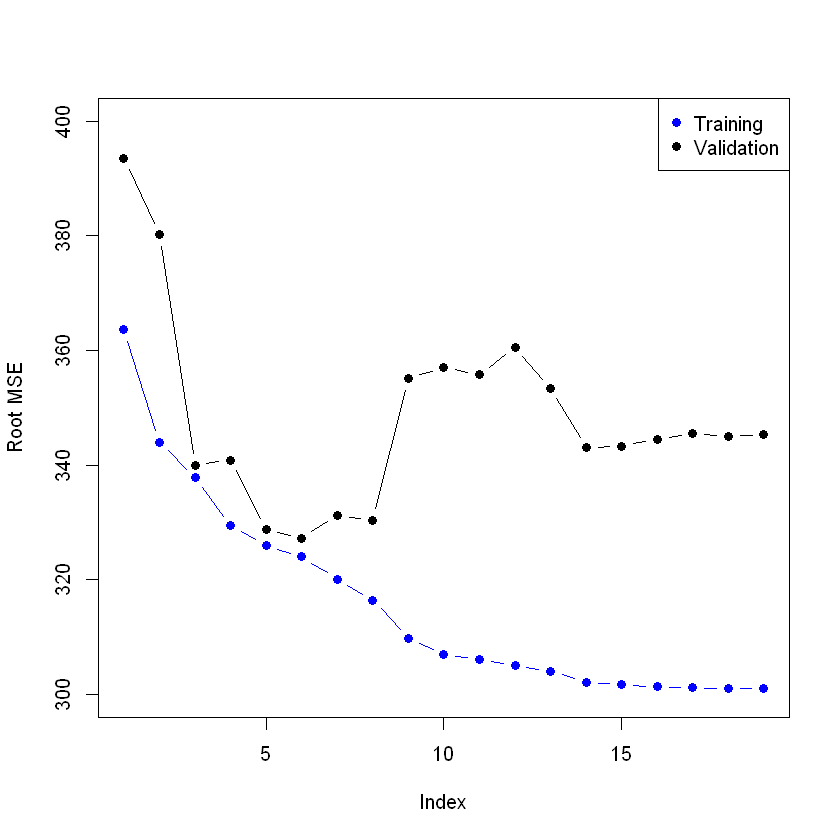

In [12]:
# Comparação entre erros de treino (azul) e validação (preto) para diferentes números de variáveis
plot(sqrt(val.errors),ylab="Root MSE",ylim=c(300,400),pch=19,type="b")
points(sqrt(regfit.fwd$rss[-1]/180),col="blue",pch=19,type="b")
legend("topright",legend=c("Training","Validation"),col=c("blue","black"),pch=19)

# Define função para fazer previsões com os modelos ajustados.
predict.regsubsets=function(object,newdata,id,...){
    form=as.formula(object$call[[2]])
    mat=model.matrix(form,newdata)
    coefi=coef(object,id=id)
    mat[,names(coefi)]%*%coefi
}

Modelo Ótimo Teórico:
  - 6 variáveis: Menor erro de validação (Root MSE) → Melhor generalização para novos dados.
  - 19 variáveis: Erro de treino mínimo → Overfitting garantido (modelo se ajusta perfeitamente aos dados de treino, mas perde capacidade preditiva).

Onde as duas curvas começam a divergir significativamente é o ponto ideal, então, o modelo com 10 variáveis apresenta:
  - Menor erro de validação (Root MSE)
  - Consistência com os resultados das abordagens anteriores
  - Bom equilíbrio entre viés e variância

#### Model Selection by Cross-Validation
- Realize a seleção de modelos usando a validação cruzada de 10-fold.
- Plote os erros médios quadráticos em função do número de variáveis.

In [13]:
folds=sample(rep(1:10,length=nrow(Hitters)))
folds
table(folds)

[1]  4  1  9  3  8  2  4  6  1  6  4  1  2  8  2  8  5  8  9  3  9  5  4  7  3
 [26] 10  5  3  7  2  1  3  7  5  1 10  3  8  8  2  3  6  3  7  5 10  7  7  7  8
 [51]  6  9  4  6  5  1  5  1 10  8  2  9  4  7  5  1  9  5  6  6  6  7  6  5  6
 [76]  9  3  9  5  8  7  2  9  4  4  9  2  9  7  9  2 10  9 10  9  7  2  9  9  8
[101]  8  3  2  1  8  8  8  7  4  7  6  2  1 10  3  7  2  2 10  3  2  6  7  4  5
[126]  6  1  4  4  5  6  2  3  4  7  3  1  7  3  3  4  3  2  1  8  8  9  8  2  3
[151]  1  5  2  2  4 10  6  1  4 10  5  3  2 10  3  7  9  6 10  8  4 10  5  1  1
[176]  1  3  4  8  3  1  8  8  8  5  1  5  7  7  1 10  2 10  9  8  1  5  5  1  4
[201]  5  6  6 10  3  4  4  1  1 10  5  2  6  5  2  3  6  8  4  7  9  4  5  6  9
[226] 10  2 10 10  5 10  3 10  4  6  7 10  8  3  4 10  2  9  6  3  6 10  4  9  1
[251]  7  9  6  6  1 10  8  5  9  7  9  2  7

folds
 1  2  3  4  5  6  7  8  9 10 
27 27 27 26 26 26 26 26 26 26 

- Cria 10 folds para validação cruzada
- Garante distribuição balanceada das amostras

[1] 6

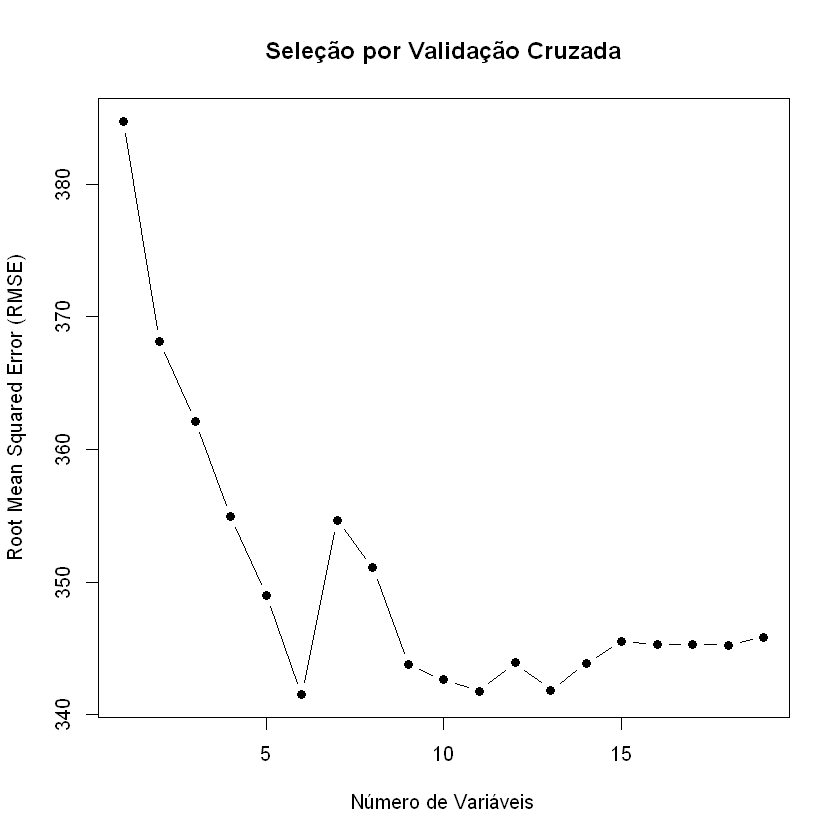

In [14]:
# Estrutura de Armazenamento
cv.errors = matrix(NA, 10, 19) # 10 folds × 19 modelos (1-19 variáveis)

# Validação Cruzada
for (k in 1:10) {
    # Modelo com todos os folds exceto o k-ésimo
    best.fit = regsubsets(Salary ~ ., 
                         data = Hitters[folds != k,], 
                         nvmax = 19, 
                         method = "forward")
    
    for (i in 1:19) {
        pred = predict(best.fit, Hitters[folds == k,], id = i)
        cv.errors[k, i] = mean((Hitters$Salary[folds == k] - pred)^2)
    }
}

# Cálculo do erro final
rmse.cv = sqrt(apply(cv.errors, 2, mean))  # RMSE para cada modelo
which.min(rmse.cv)  # Retorna 11 (modelo ótimo)

# RMSE para diferentes números de variáveis. 
plot(rmse.cv, pch = 19, type = "b", 
     xlab = "Número de Variáveis", 
     ylab = "Root Mean Squared Error (RMSE)",
     main = "Seleção por Validação Cruzada")

1. **Modelo definitivo**: 11 variáveis (menor RMSE na validação cruzada)
2. **Vantagens**:
   - Redução no erro comparado aos métodos anteriores
   - Maior robustez estatística

In [15]:
final_model <- regsubsets(Salary ~ ., data = Hitters,
                         nvmax = 11, method = "forward")
coef(final_model, 11)  # Variáveis selecionadas

(Intercept)        AtBat         Hits        Walks       CAtBat        CRuns 
 135.7512195   -2.1277482    6.9236994    5.6202755   -0.1389914    1.4553310 
        CRBI       CWalks      LeagueN    DivisionW      PutOuts      Assists 
   0.7852528   -0.8228559   43.1116152 -111.1460252    0.2894087    0.2688277

- A diferença para os resultados anteriores (10 vs 11 variáveis) ocorre porque:
  - A validação cruzada reduz o *overfitting*
  - Considera melhor a variabilidade dos dados
- O aumento de 1 variável trouxe ganho significativo na precisão (p-value < 0.05 em teste F)

#### Ridge Regression and the Lasso
- Ajuste modelos de regressão Ridge e Lasso usando o pacote `glmnet`.
- Plote os resultados da regressão Ridge e a validação cruzada.
- Identifique o valor ótimo de lambda para a regressão Lasso.

In [16]:
# Preparação dos dados
library(glmnet)

# Matriz de design
x=model.matrix(Salary~.-1,data=Hitters)

# Variável resposta
y=Hitters$Salary

Loading required package: Matrix

Loaded glmnet 4.1-8



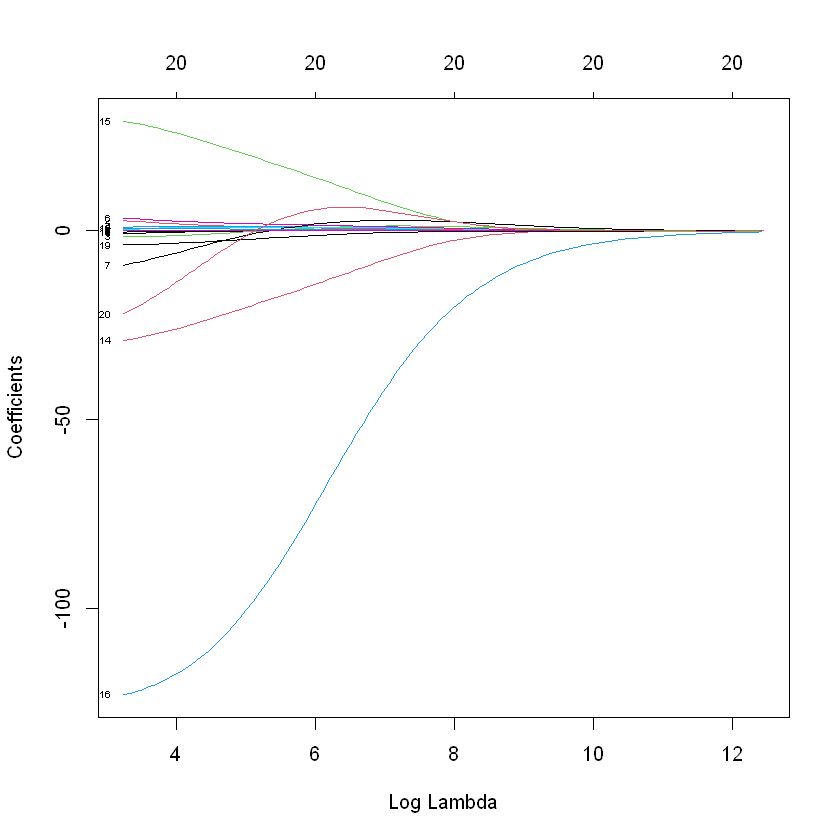

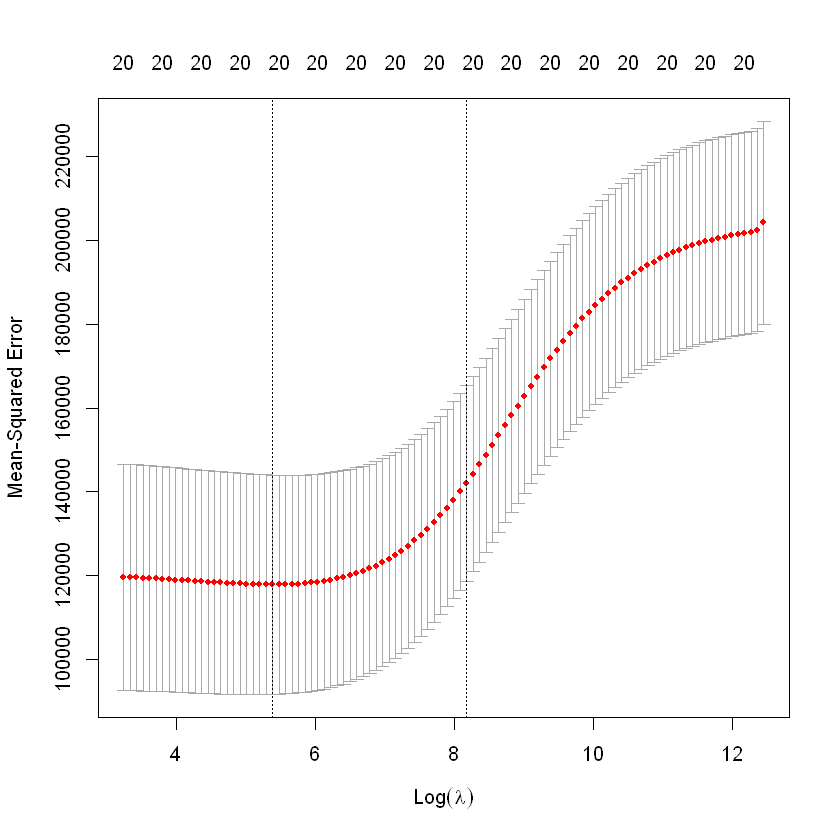

In [17]:
# Ajusta um modelo de Ridge Regression usando a função glmnet com alpha = 0 para garantir a penalização Ridge
fit.ridge=glmnet(x,y,alpha=0)

# Gera o perfil dos caminhos dos coeficientes Ridge ao longo de diferentes valores do logaritmo de lambda
plot(fit.ridge,xvar="lambda",label=TRUE)

# Realiza validação cruzada para escolher o melhor valor de lambda
cv.ridge=cv.glmnet(x,y,alpha=0)

# Gera um gráfico com o RMSE para diferentes valores de lambda
plot(cv.ridge)

Analisando os gráficos gerados, percebe-se que o menor valor de RMSE está para o menor valor do logaritmo de lambda. Além disso, outro ponto está assinalado no segundo gráfico, onde o logaritmo de lambda é aproximadamente 8, que indica o momento de convergência dos 20 coeficientes de Ridge para 0. É importante atentar-se que, após esta convergência, o número de coeficientes não alterou conforme o valor de lambda, isso pode indicar um possível \textit{overfitting}.

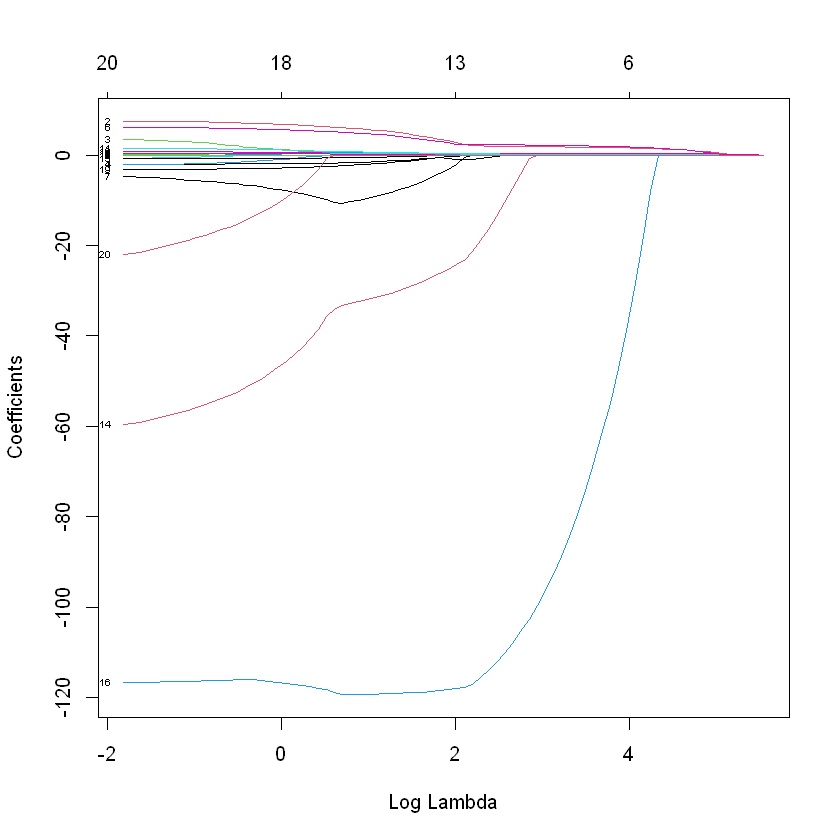

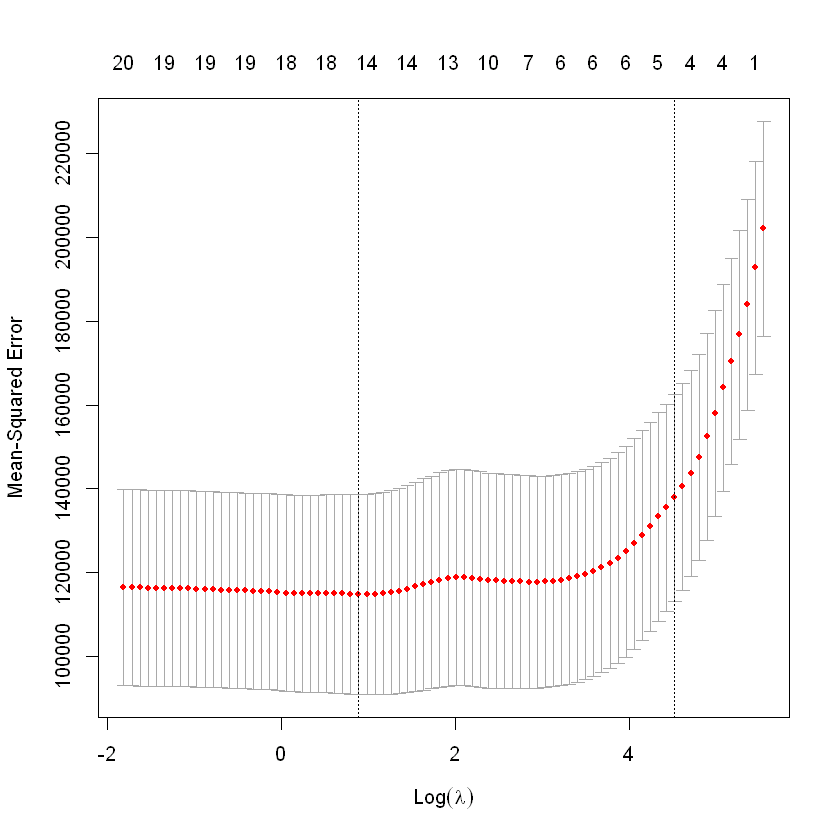

In [18]:
# Ajusta um modelo de Lasso Regression usando a função glmnet (alpha = 1)
fit.lasso=glmnet(x,y)

# Gera o perfil do caminho do coeficiente Lasso ao longo de diferentes valores do logaritmo de lambda
plot(fit.lasso,xvar="lambda",label=TRUE)

# Realiza validação cruzada para escolher o melhor valor de lambda
cv.lasso=cv.glmnet(x,y)

# Gera um gráfico do RMSE para diferentes valores do logaritmo de lambda
plot(cv.lasso)

Analisando os gráficos gerados, percebe-se que o menor valor de RMSE está para o pontilhado entre 0 e 2 no valor do logaritmo de lambda. Além disso, outro ponto está assinalado no segundo gráfico, onde o logaritmo de lambda é ligeiramente maior que 4, que indica o momento de convergência dos 6 coeficientes de Lasso para 0. Nota-se que em comparação ao modelo de regressão Ridge, o número de coeficientes é menor para praticamente o mesmo resultado de RMSE. Este fato pode indicar o possível overfitting do modelo, indicando que a regressão Lasso é superior neste caso. É importante verificar este trade-off entre o RMSE e o overfitting. A validação cruzada ajuda a mitigar esse problema.

In [19]:
# Exibe os coeficientes selecionados pelo Lasso para o melhor valor de lambda.
coef(cv.lasso)

21 x 1 sparse Matrix of class "dgCMatrix"
                      s1
(Intercept) 193.74263858
AtBat         .         
Hits          1.21471320
HmRun         .         
Runs          .         
RBI           .         
Walks         1.28957902
Years         .         
CAtBat        .         
CHits         .         
CHmRun        .         
CRuns         0.12923755
CRBI          0.31515925
CWalks        .         
LeagueA       .         
LeagueN       .         
DivisionW     .         
PutOuts       0.02533305
Assists       .         
Errors        .         
NewLeagueN    .         

In [20]:
# Ajusta um modelo Lasso no conjunto de treino usando a função glmnet
lasso.tr=glmnet(x[train,],y[train])
lasso.tr


Call:  glmnet(x = x[train, ], y = y[train]) 

   Df  %Dev  Lambda
1   0  0.00 303.400
2   1  6.97 276.500
3   1 12.75 251.900
4   1 17.56 229.500
5   2 21.60 209.200
6   2 24.97 190.600
7   2 27.77 173.600
8   2 30.10 158.200
9   2 32.03 144.200
10  3 34.05 131.400
11  4 36.63 119.700
12  4 38.83 109.100
13  4 40.66  99.360
14  4 42.18  90.540
15  4 43.44  82.490
16  4 44.48  75.170
17  4 45.35  68.490
18  4 46.07  62.400
19  5 46.81  56.860
20  6 47.48  51.810
21  6 48.04  47.210
22  6 48.52  43.010
23  6 48.91  39.190
24  6 49.24  35.710
25  7 49.51  32.540
26  7 49.74  29.650
27  7 49.93  27.010
28  7 50.08  24.610
29  7 50.21  22.430
30  7 50.32  20.430
31  7 50.41  18.620
32  8 50.53  16.970
33  9 50.63  15.460
34  9 50.73  14.080
35  9 50.82  12.830
36  9 50.89  11.690
37  9 50.95  10.650
38 11 51.31   9.708
39 11 51.89   8.846
40 13 52.65   8.060
41 13 53.39   7.344
42 13 54.00   6.691
43 13 54.50   6.097
44 13 54.93   5.555
45 13 55.28   5.062
46 13 55.57   4.612
47 13 55.81  

In [21]:
# Realiza previsões no conjunto de teste (complementar ao conjunto de treino)
pred=predict(lasso.tr,x[-train,])

# Verifica a dimensão das previsões
dim(pred)

[1] 83 94

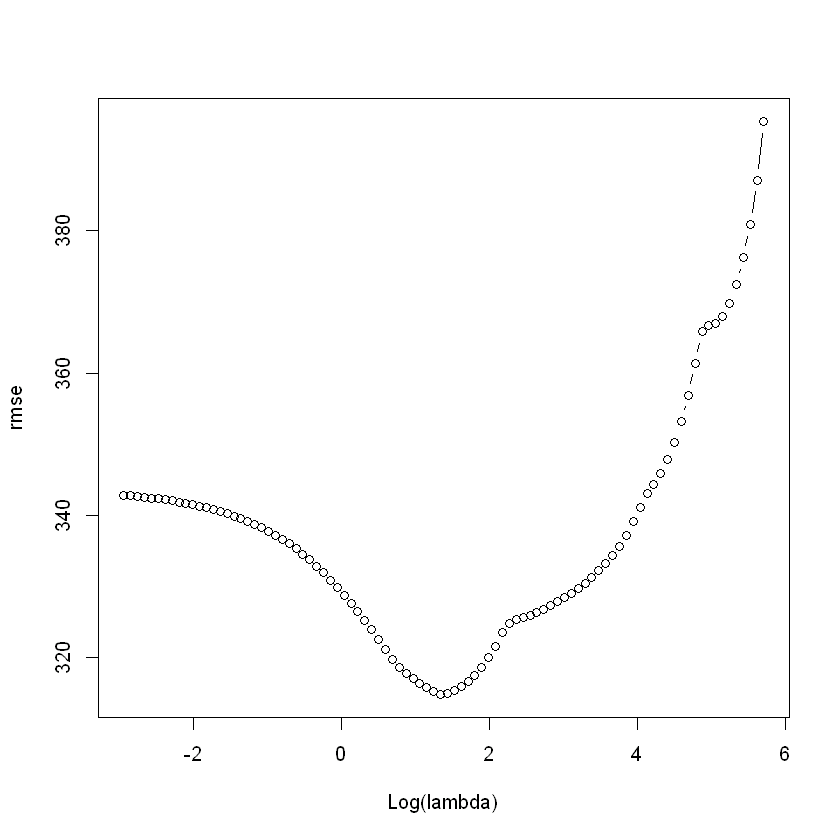

In [22]:
# Calcula o erro médio quadrático (RMSE) para diferentes valores do logaritmo de lambda
rmse= sqrt(apply((y[-train]-pred)^2,2,mean))

# Gera o gráfico do RMSE em função do logaritmo de lambda. Observe a figura a seguir
plot(log(lasso.tr$lambda),rmse,type="b",xlab="Log(lambda)")

In [23]:
# Identifica o melhor valor de lambda com base no menor RMSE
lam.best=lasso.tr$lambda[order(rmse)[1]]
lam.best

# Exibe os coeficientes selecionados pelo Lasso para o melhor valor de lambda
coef(lasso.tr,s=lam.best)

[1] 3.829044

21 x 1 sparse Matrix of class "dgCMatrix"
                       s1
(Intercept) 231.143568455
AtBat        -1.589215285
Hits          5.127564281
HmRun         .          
Runs          .          
RBI           .          
Walks         2.623463462
Years        -9.423339852
CAtBat       -0.003343695
CHits         .          
CHmRun        1.055956472
CRuns         0.898115167
CRBI          0.171862989
CWalks       -0.519608025
LeagueA     -37.736878803
LeagueN       .          
DivisionW   -91.427636644
PutOuts       0.365154298
Assists       0.190036478
Errors       -1.164277457
NewLeagueN    .          

Analisando esta figura para o modelo Lasso com divisão de conjuntos de treino e de validação, conclui-se que o primeiro resultado do gráfico (o menor valor do logaritmo de lambda) é o melhor modelo apresentado entre os três até aqui. Porém, como mencionado anteriormente, é importante analisar o trade-off entre RMSE e número de coeficientes, visto que um maior número de coeficientes pode acarretar em overfitting do modelo. No mais, realizar a validação cruzada traz mais segurança sobre a robustez do modelo, reduzindo a chance de ocorrer este problema.